In [7]:
from pymongo import MongoClient
import matplotlib.pyplot as plt
import numpy
import pandas as pd

# mongo configuration
myclient = MongoClient("mongodb://localhost:27017/")
mydb = myclient["uefa"]
mycol = mydb["players"]

#All of teams with red cards
total = [{}]
#Name of teams
teams = [{}]
#Amount of red cards the team has
score ={}

#returns team names
for item in mycol.find({},{ "_id" : 0, "team": 1}):
    teams.append(item)
    
#returns team names and red cards    
for item in mycol.find({},{ "_id" : 0, "team": 1, "red cards" : 1}):
    total.append(item)

In [8]:
#counter
i=0

for row in total:
    for item in row:
        #If the team name matches in both dics and is not empty
        if row["team"]==teams[i]["team"] and row["team"]!='' and row["team"] is not None:
            #Team name variable
            team_name=row["team"]
            #If the team name exists
            if team_name in score:
                #Because of the fors, the number is divided by two
                score[team_name]+=row["red cards"]/2
            else:
                score[team_name]=row["red cards"]/2
    i=i+1

In [9]:
#number is rounded, so it parses to int from float, this value is ready for pie chart
#print(round(score["TEAMNAME"])) #for example Atalanta BC

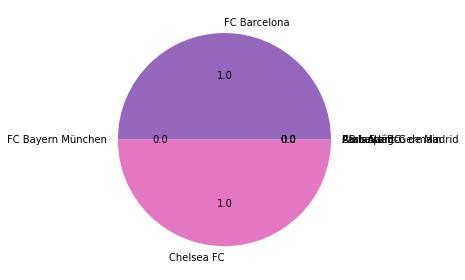

In [10]:
#creating a panda dataframe for the pie chart
df=pd.DataFrame(score.items(), columns=['Team Name', 'Num of cards'])

#function to round up number of cards
def absolute_value(val):
    
    a  = numpy.round(val/100.*df['Num of cards'].sum(), 0)
    return a


plt.pie(
    #the values are number of cards
    df['Num of cards'],
    # with the labels being team names
    labels=df['Team Name'],
    #this prints the number of cards to pie chart
    autopct=absolute_value
    )

# View the plot
plt.tight_layout()
plt.show()